In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [9]:
files = glob.glob('../../../FeT_GOM22SU/FeT_RZ_GOM22SU/*.txt')
files

#here is where the output will go 
path2 = '../../../FeT_GOM22SU/FeT_RZ_GOM22SU_2242_2243_2244_2248_2251_2252_2253.csv'
files

['../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\224261_Absorbance__0__96.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\224261_Absorbance__1__97.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\224261_Absorbance__2__98.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\224361_Absorbance__0__21.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\224361_Absorbance__1__22.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\224361_Absorbance__2__23.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\224461_Absorbance__0__24.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\224461_Absorbance__1__25.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\224461_Absorbance__2__26.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\224861_Absorbance__0__39.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\224861_Absorbance__1__40.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\224861_Absorbance__2__41.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\225161_Absorbance__0__27.txt',
 '../../../FeT_GOM22SU/FeT_RZ_GOM22SU\\225161_Absorbance__1__28.txt',
 '../../../FeT_GOM22

In [10]:
def GET_DATA(name):
    df = pd.read_csv(name, skiprows=15, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']
    #df['wl'] = df['wl']
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [11]:
frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

,224261_Absorbance__0__96.txt,224261_Absorbance__1__97.txt,224261_Absorbance__2__98.txt,224361_Absorbance__0__21.txt,224361_Absorbance__1__22.txt,224361_Absorbance__2__23.txt,224461_Absorbance__0__24.txt,224461_Absorbance__1__25.txt,224461_Absorbance__2__26.txt,224861_Absorbance__0__39.txt,...,225261_Absorbance__3__33.txt,225261_Absorbance__4__34.txt,225261_Absorbance__5__35.txt,225262_Absorbance__0__36.txt,225262_Absorbance__1__37.txt,225262_Absorbance__2__38.txt,225361_Absorbance__0__99.txt,225361_Absorbance__1__100.txt,225361_Absorbance__2__101.txt,wl
wl,,,,,,,,,,,,,,,,,,,,,
189,-211837.929847,-511732.576491,-29431.607826,568423.358168,-5848.852901,-4318.665777,-62251.639734,262484.066180,-25996.931642,63046.678801,...,466459.035672,-40232.562425,68117.562878,2250.727778,-49665.336895,204395.730041,-384440.355125,-121446.298686,30458.744991,189
190,-207612.818247,-501469.244583,-28826.212367,557027.400687,-5732.428425,-4230.768002,-60997.120237,257229.401594,-25485.987539,61781.900400,...,457105.799316,-39412.587594,66762.279047,2206.043770,-48670.168902,200304.260687,-376696.991696,-118989.244812,29848.206793,190
191,-203444.261363,-491344.066201,-28229.171038,545784.783680,-5617.558625,-4144.070345,-59759.569013,252045.337529,-24981.779415,60534.151272,...,447878.437517,-38603.827601,65425.090908,2161.955033,-47688.383785,196267.759002,-369058.308528,-116565.554244,29245.882204,191
192,-199331.878149,-481356.105193,-27640.425832,534694.468492,-5504.233054,-4058.564562,-58538.870528,246931.396486,-24484.262596,59303.315995,...,438776.097523,-37806.205240,64105.876849,2118.457574,-46719.890950,192285.853248,-361523.593235,-114174.998935,28651.715600,192
193,-195275.287560,-471504.425412,-27059.918741,523755.416468,-5392.441266,-3974.242407,-57334.909246,241887.100966,-23993.392406,58089.279148,...,429797.926582,-37019.643310,62804.515259,2075.547404,-45764.599806,188358.171689,-354092.133429,-111817.350834,28065.651358,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-122.146324,-122.146442,-0.001133,-11.002623,-23.156264,-25.043380,-101.384898,-2.169124,-3.052536,-2.480352,...,0.108568,0.108463,-3.622672,0.084501,-2.864487,-12.081299,-10.226164,0.137160,-2.836989,876
877,-129.184428,-129.184546,-0.001133,-11.622966,-24.470210,-26.466332,-107.200590,-2.310775,-3.223077,-2.639627,...,0.110583,0.110478,-3.825429,0.086113,-3.045484,-12.808374,-10.801746,0.139780,-2.995239,877
878,-136.487828,-136.487947,-0.001133,-12.266094,-25.832836,-27.942090,-113.234450,-2.458298,-3.399755,-2.805434,...,0.112598,0.112493,-4.035531,0.087725,-3.233830,-13.563933,-11.398422,0.142399,-3.159168,878


In [12]:
#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code 
names = d.columns.str.rsplit('_', n=7).str[0]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = d.groupby(names, axis=1).mean()
df['wl'] = df.index
df

,224261,224361,224461,224861,225161,225261,225262,225361,wl
wl,,,,,,,,,
189,-251000.704721,186085.279830,58078.498268,-138640.733724,22470.667134,-74395.640630,52327.040308,-158475.969607,189
190,-245969.425066,182354.734753,56915.431273,-135840.640229,22021.988777,-72888.295972,51280.045185,-155279.343238,190
191,-241005.832867,178674.384903,55767.996367,-133078.503072,21579.322986,-71401.448511,50247.110083,-152125.993523,191
192,-236109.469725,175043.890292,54636.087787,-130354.063248,21142.629204,-69934.957941,49228.139957,-149015.625523,192
193,-231279.877238,171462.910932,53519.599771,-127667.061751,20711.866874,-68488.683958,48223.039762,-145947.944302,193
...,...,...,...,...,...,...,...,...,...
876,-81.431300,-19.734089,-35.535519,-20.827797,-44.757993,-15.281268,-4.953762,-4.308664,876
877,-86.123369,-20.853169,-37.578147,-22.020675,-47.328192,-16.151393,-5.255915,-4.552402,877
878,-90.992303,-22.013673,-39.697501,-23.258175,-49.994853,-17.053842,-5.570013,-4.805064,878


Text(0.5, 1.0, 'BC_ABS_BLU22_2226_GB')

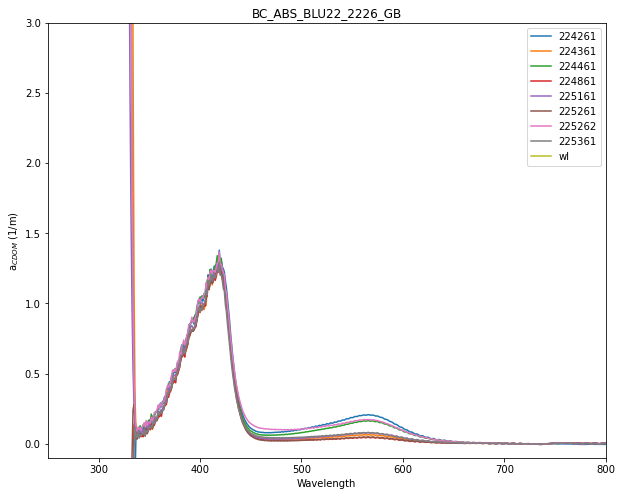

In [13]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,3)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("BC_ABS_BLU22_2226_GB")


In [14]:
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    
    abs_562 = df[(df['wl']==562)][col].mean()
    
    ydata = df[(df['wl']>=450) & (df['wl']<=700)][col]
    xdata = df[(df['wl']>=450) & (df['wl']<=700)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    inter = scipy.integrate.simps(ydata, x=xdata, even='avg')
    
    dict = {'sample':[columnName],
        'abs_562':[abs_562], 
        'intagration':[inter],}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')
ss_outs.to_csv(path2)

ss_outs

,abs_562,intagration
sample,,
224261,0.205357,23.222044
224361,0.064755,8.172537
224461,0.162706,18.592532
224861,0.045884,5.806511
225161,0.077536,9.239048
225261,0.047980,5.750836
225262,0.172327,21.857517
225361,0.079426,9.915611


EXPERIMENTAL